### Third Project: Medical Data Visualizer

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

%matplotlib inline

Read csv and store it in a Pandas Dataframe df, then set as index of the dataframe the column of the csv called "id".

In [47]:
df = pd.read_csv("../csv/medical_examination.csv")
df.set_index("id", inplace=True)

In [48]:
df["weight"].head()

id
0    62.0
1    85.0
2    64.0
3    82.0
4    56.0
Name: weight, dtype: float64

Remember that if you use bracket notation for a dataframe (which always calls a column of it) to call a column that does not exist, you create that column with values you specify. In this case, I create an "overweight" column calculated as a result of computations over two, already existing, columns.

The logic behind this calculation is to first compute the BMI (weight/(height/100)**2), check if this BMI is > than 25, and returning a value True or False based on this logical condition. Then, given that we want the overweight column to take either value 0 or 1, we transform the True/False in 1/0 using the astype(int) method. 

In [49]:
df["overweight"] = ((df["weight"]/((df["height"]/100)**2))>25).astype(int)
df[["overweight", "weight", "height"]]


,overweight,weight,height
id,,,
0,0,62.0,168
1,1,85.0,156
2,0,64.0,165
3,1,82.0,169
4,0,56.0,156
...,...,...,...
99993,1,76.0,168
99995,1,126.0,158
99996,1,105.0,183


In [50]:
df.columns

Index(['age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight'],
      dtype='object')

Use the .loc method to access specific rows in a dataframe (the ones respecting the logical condition before the comma), take the column of interest for such rows (cholesterol) and set their values to 0 or 1.

In [51]:
df.loc[df["cholesterol"]==1, "cholesterol"] = 0
df.loc[df["cholesterol"]>1, "cholesterol"] = 1

In [52]:
df.loc[df["gluc"]==1, "gluc"] = 0
df.loc[df["gluc"]>1, "gluc"] = 1

##### Now more sophisticated stuff. In order to plot a Seaborn Categorical Plot of the "count" kind (basically a histogram counting the occurrences for each medical condition in the dataset: alcoholist, smoker etc.), we need to reformat our df so that it is in a long rather than a wide format. I.e. we need to have less columns, but more rows, grouping the different columns corresponding to the medical conditions under a general "value" column. The only column that will remain separated is "cardio", which we want to distinguish to plot the countplot for cardio=0 and cardio=1. 

#### To do so, we create long_df using the melt function on the original dataframe.

In [53]:
categorical_variables = ["active","alco","cholesterol","gluc", "overweight","smoke"]
long_df = pd.melt(df, id_vars=["cardio"], value_vars=categorical_variables,ignore_index=False)

In [54]:
long_df.rename(columns={"value":"value"},inplace=True)

In [55]:
long_df.head()

,cardio,variable,value
id,,,
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0


Once you have your dataframe formatted correctly, plotting the catplot is straightforward. Use the long_df as the data source for the plot, with **hue** you specify that you want to divide the bar corresponding to each condition according to the values taken in the input of hue (so basically equivalently to setting a legend in Power BI). Then, you specify what you want on the **x** axis (in this care, *variable* contains the names of the medical conditions we want), and **col** allows you to split the histogram into different columns based on how many values "cardio" has (in this case, only 2 columns).

C:\Users\matte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


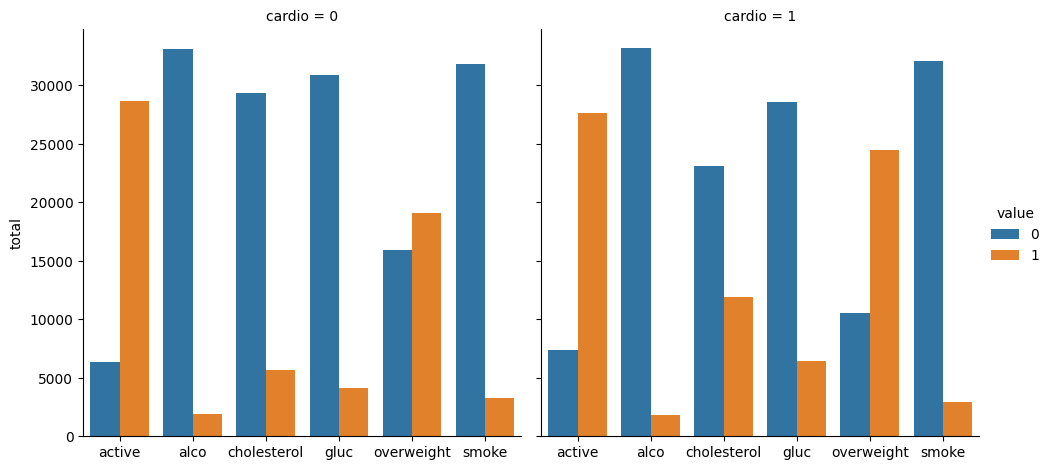

In [56]:
g = sns.catplot(data=long_df,hue="value",kind="count", x="variable", col="cardio")
g.set_axis_labels("","total")
fig = g.fig

Here you can see that without specifying a hue, the graph makes little sense, because the total count for each medical variable is the same

C:\Users\matte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


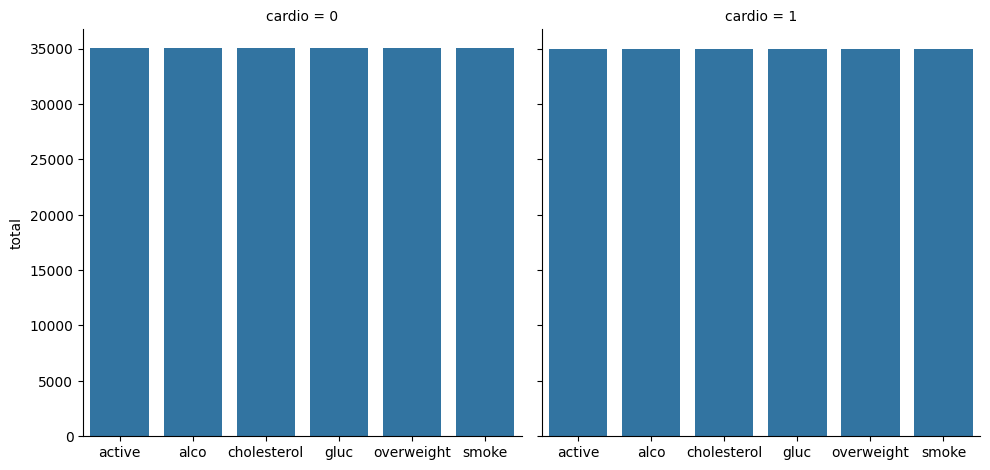

In [57]:
g = sns.catplot(data=long_df,kind="count", x="variable", col="cardio")
g.set_axis_labels("","total")
fig = g.fig

***
Now we want to plot a heatmap, based on the correlation matrix of the dataframe. That is, a matrix containing the values of the *r* correlation metrics for each pair of (quantitative) variables in the df. A heatmap creates a gradient of colors showing the relative strength of the value you want to emphasize (in this case, the correlation value). To do so, first we clean the dataset removing data we find outliers or wrong.

In [58]:
new_df = df[(df["height"]>=df["height"].quantile(0.025)) & (df["height"]<=df["height"].quantile(0.975)) & (df["weight"]>=df["weight"].quantile(0.025)) & (df["weight"]<=df["weight"].quantile(0.975)) & (df["ap_lo"] <= df["ap_hi"])]

new_df

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1


Then compute the correlation matrix simply using the Pandas .corr() method over the entire dataframe. This returns **a new dataframe**, which we will be working from now on to get to the heatmap.

In [59]:
correlation_matrix = new_df.corr()
correlation_matrix

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
age,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
sex,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274
alco,-0.026970,0.168637,0.089785,0.059917,0.000769,0.033042,0.038446,0.014297,0.341200,1.000000,0.025847,-0.011088,0.025056


If we want to hide the upper-right triangle of the correlation matrix (which simply repeats the same values simmetrically to the lower triangle), we can create a boolean mask, that we can then use to filter the correlation_matrix dataframe. To create this mask, first we create a new matrix of the same shape as the correlation_matrix but all filled with True (using the **ones_like** function with the optional **dtype=bool** option), and then we use the NumPy **triu** function, which writes as false all the values in the matrix in the triangle we want to filter.

In [70]:
mask = np.triu(np.ones_like(correlation_matrix,dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         True,  True,  True,  True],
       [False, False, False,

To hide the upper, we can use the **.mask()** method that replaces with NaN all the values where the condition is True. If we wanted the opposite, we could use the **.where()** method, to replace all the values where the condition is false with NaN. In both cases, we are producting a new dataframe. If we want to use it later on, we should store it in a new variable.

In [71]:
correlation_matrix.where(mask)

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
age,1.0,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
sex,NaN,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,NaN,NaN,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,NaN,NaN,NaN,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,NaN,NaN,NaN,NaN,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,NaN,NaN,NaN,NaN,NaN,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.341200,0.026940,-0.020345,-0.003274
alco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.025847,-0.011088,0.025056


In [72]:
correlation_matrix_masked = correlation_matrix.mask(mask)

Let us now use the Object-Oriented Programming version of Matplotlib (in particular, exploiting the Seaborn module built on top of it) to show both the heatmap masked and unmasked. OOP matplotlib consist in creating a **fig** (the whole figure comprehensive of any graphs you want to put inside), and several **axes**, as many as you need depending on how many graphs you want to have. If you just want one, you call a single **ax**.

<Axes: >

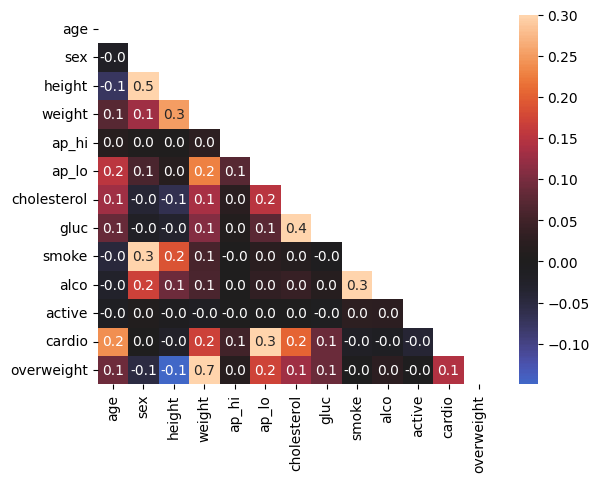

In [74]:
fig, ax = plt.subplots()

sns.heatmap(correlation_matrix_masked,ax=ax,annot=True, fmt="0.1f",vmax=.3,center=0)

If instead you want multiple graphs inside the fig, you define **axes**, you specify how many rows and/or columns you want (i.e. how many sub-graphs you want in your overall figure), and you plot each of them by accessing them with bracket notation **axes[0]**, **axes[1]** etc. This way, you always know exactly in which sub-graph are you plotting the things you want. Let us show the two heatmaps side-by-side, i.e. in two columns. 

Note that when you use the Seaborn (sns) module, you specify the ax you want within the plotting function you are applying, rather than externally.

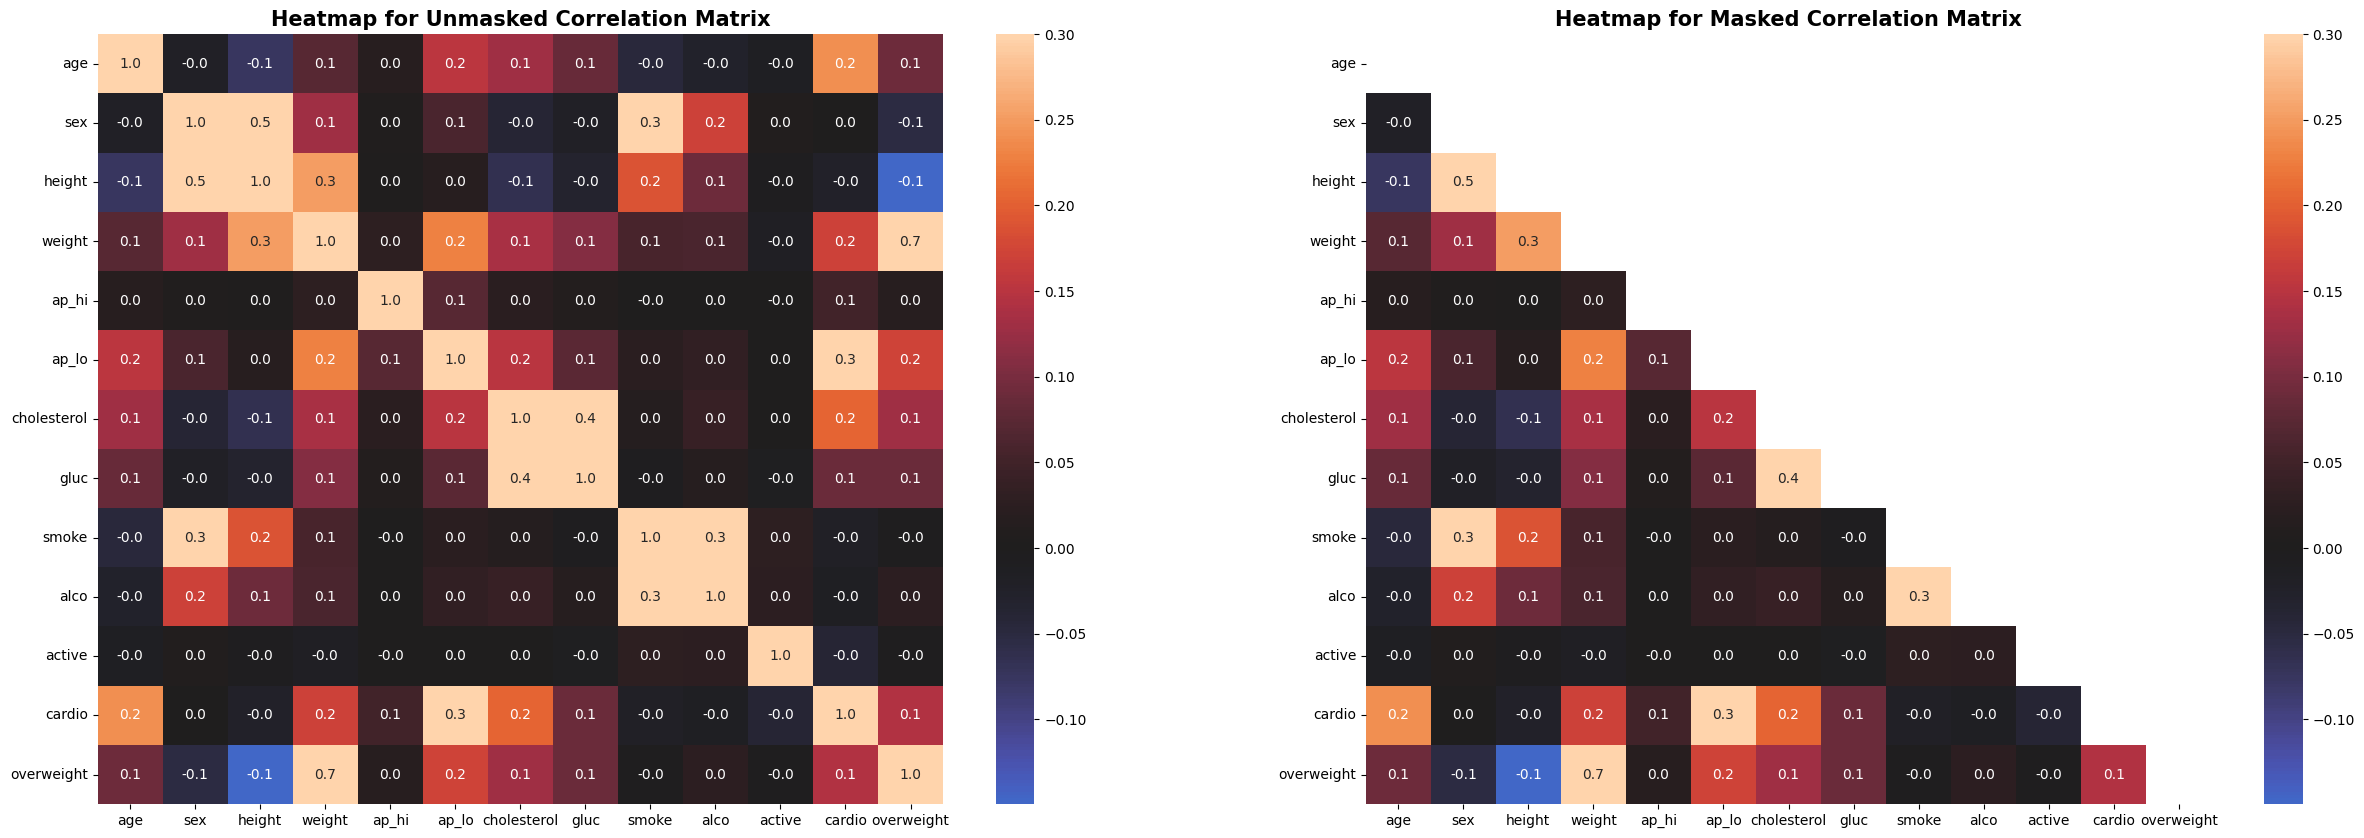

In [84]:
fig, axes = plt.subplots(ncols=2, figsize=(30,10))

sns.heatmap(data=correlation_matrix, ax=axes[0], annot=True, fmt="0.1f",vmax=.3,center=0)
sns.heatmap(data=correlation_matrix_masked, ax=axes[1], annot=True, fmt="0.1f",vmax=.3,center=0)

title_unmasked = axes[0].set_title("Heatmap for Unmasked Correlation Matrix")
title_unmasked.set_fontweight("bold")
title_unmasked.set_fontsize(15)

title_masked = axes[1].set_title("Heatmap for Masked Correlation Matrix")
title_masked.set_fontweight("bold")
title_masked.set_fontsize(15)